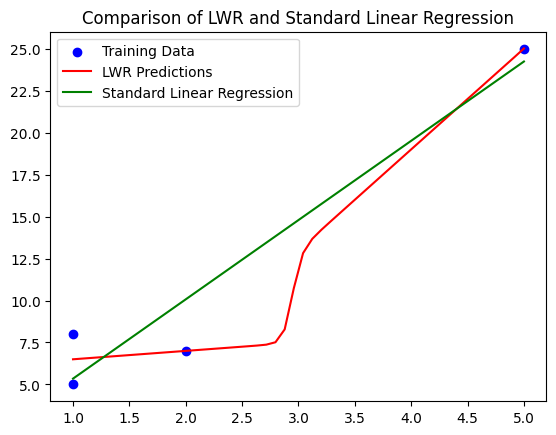

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def locally_weighted_regression(x_train, y_train, x_test, tau):
    distances = np.array([np.abs(x_test - x) for x in x_train])
    weights = np.exp(-(distances**2)/(2*(tau**2)))
    X = np.array([np.ones_like(x_train), x_train]).T
    W = np.diag(weights)
    beta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y_train
    y_pred = beta[0] + beta[1] * x_test
    return y_pred, beta

x_train = np.array([5, 1, 2, 1])
y_train = np.array([25, 5, 7, 8])
x_test_points = np.linspace(min(x_train), max(x_train), num=50)
tau = 0.4

lwr_y_pred = []
for x_test in x_test_points:
    y_pred,_ = locally_weighted_regression(x_train, y_train, x_test, tau)
    lwr_y_pred.append(y_pred)

X_train_std = np.array([np.ones_like(x_train), x_train]).T
beta_std = np.linalg.inv(X_train_std.T @ X_train_std) @ X_train_std.T @ y_train
std_y_pred = lambda x: beta_std[0] + beta_std[1] * x
std_y_pred_points = std_y_pred(x_test_points)

plt.figure()
plt.title("Comparison of LWR and Standard Linear Regression")
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_test_points, lwr_y_pred, color='red', label='LWR Predictions')
plt.plot(x_test_points, std_y_pred_points, color='green', label='Standard Linear Regression')
plt.legend()
plt.show()

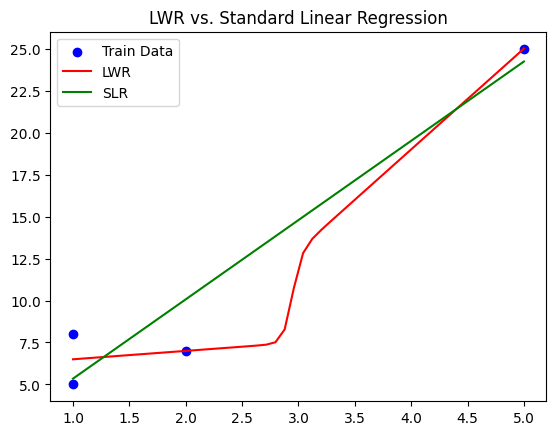

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Locally Weighted Regression
def lwr(x_train, y_train, x_test, tau):
    weights = np.exp(-((x_test - x_train) ** 2) / (2 * tau ** 2))
    W = np.diag(weights)
    
    X = np.column_stack((np.ones(len(x_train)), x_train))
    beta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y_train
    return beta[0] + beta[1] * x_test

# Training data
x_train = np.array([5, 1, 2, 1])
y_train = np.array([25, 5, 7, 8])

# Test data
x_test_vals = np.linspace(min(x_train), max(x_train), 50)
tau = 0.4

# Predictions using LWR
lwr_preds = [lwr(x_train, y_train, x, tau) for x in x_test_vals]

# Standard Linear Regression (without weights)
X = np.column_stack((np.ones(len(x_train)), x_train))
beta = np.linalg.inv(X.T @ X) @ X.T @ y_train
slr_preds = beta[0] + beta[1] * x_test_vals

# Plotting
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test_vals, lwr_preds, color='red', label='LWR')
plt.plot(x_test_vals, slr_preds, color='green', label='SLR')
plt.title("LWR vs. Standard Linear Regression")
plt.legend()
plt.show()
